In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load datasets
train_df = pd.read_csv("../data/train.csv")
stores_df = pd.read_csv("../data/stores.csv")
features_df = pd.read_csv("../data/features.csv")

# Quick look
print(train_df.shape)
print(stores_df.shape)
print(features_df.shape)

(421570, 5)
(45, 3)
(8190, 12)


In [3]:
# Merge stores info
merged_df = train_df.merge(stores_df, how="left", on="Store")

# Merge features info
merged_df = merged_df.merge(features_df, how="left", on=["Store", "Date"])

# Convert Date to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
merged_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
dtype: int64

In [5]:
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())

In [6]:
merged_df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,136727.915739,60.090059,3.361027,6026.195471,1021.307467,484.687953,2090.196076,3815.475623,171.201947,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,212.416993,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,5039.770624,5060.726828,5527.479863,3669.249108,3625.326240,39.159276,1.863296


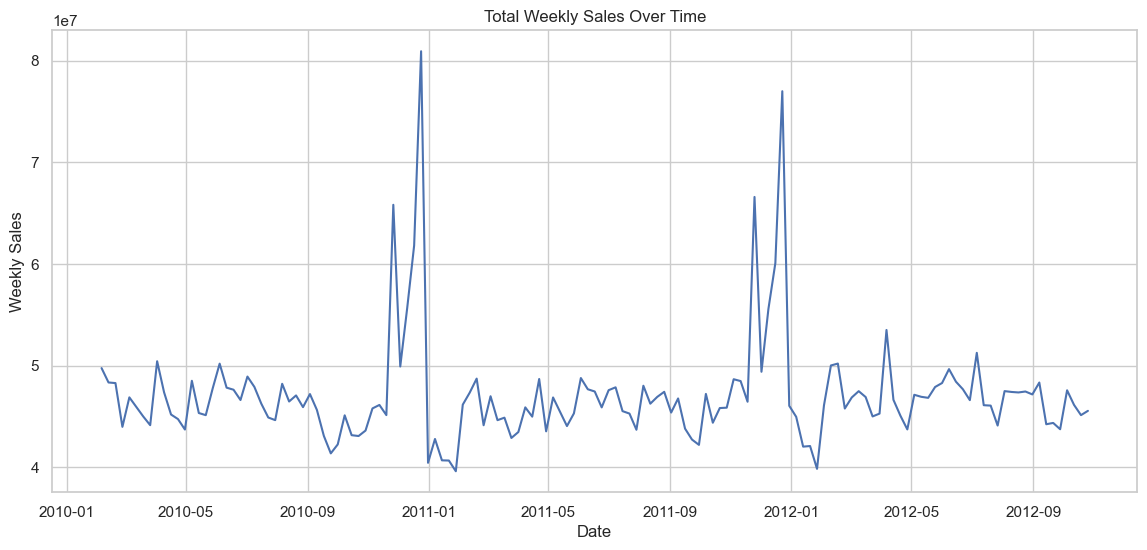

In [7]:
sales_trend = merged_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=sales_trend, x='Date', y='Weekly_Sales')
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

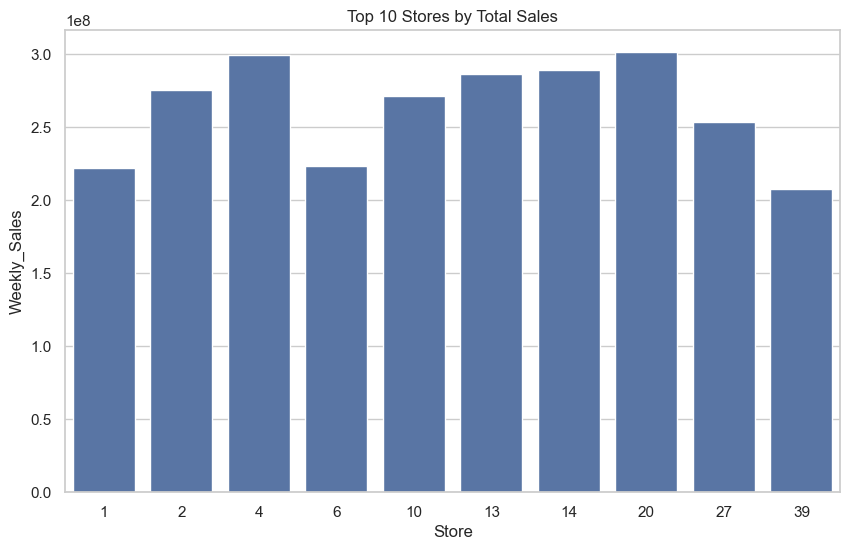

In [8]:
store_sales = merged_df.groupby('Store')['Weekly_Sales'].sum().reset_index()

top_stores = store_sales.sort_values(by='Weekly_Sales', ascending=False).head(10)
sns.barplot(data=top_stores, x='Store', y='Weekly_Sales')
plt.title("Top 10 Stores by Total Sales")
plt.show()

In [9]:
print(merged_df.columns.tolist())

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y']


In [10]:
merged_df = merged_df.rename(columns={"IsHoliday_x": "IsHoliday"})

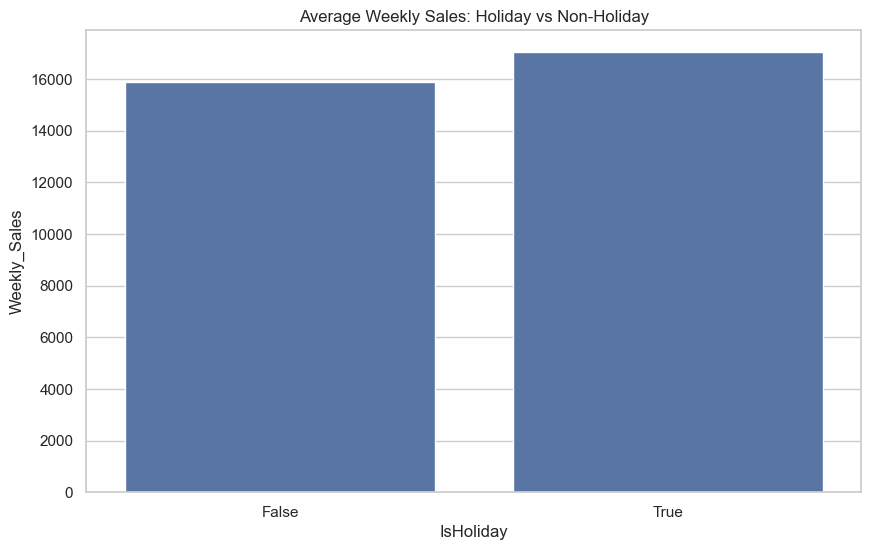

In [11]:
holiday_sales = merged_df.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()
sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales')
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.show()

In [12]:
merged_df.to_csv("../data/merged_retail_sales.csv", index=False)